<a href="https://colab.research.google.com/github/nori-sayamaru/SemanticFunctionDistillation/blob/main/SemanticFunctionDistillation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

【 MATHEMATICS 】 Logic Purity: 100.0%


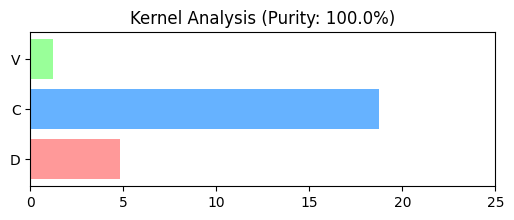

【 CAT_NOISE 】 Logic Purity: 88.21%


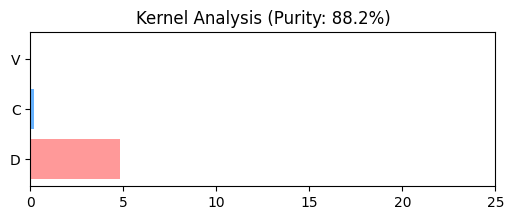

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# iPhone OS Kernel: LogicPurityEngine V1.0
# ==========================================
class LogicPurityEngine:
    def __init__(self):
        # 1. 道具箱に「というものは」や「とは」などの定義語を補強
        self.logic_map = {
            "Causality": ["ゆえに", "したがって", "なぜなら", "よって", "からだ", "ため"],
            "Structure": ["である", "定義", "一意", "真である", "命題", "戦略", "というものは", "とは"],
            "Verification": ["証明", "矛盾", "提言", "確認", "検証"]
        }
        # 2. 重みを分散（Chainの独裁を終わらせ、定義の提示[Structure]を評価する）
        self.w = np.array([1.2, 2.5, 1.2, 3.0]) # [Density, Chain, Verification, Bias]

    def analyze(self, text):
        counts = {k: sum(1 for w in v if w in text) for k, v in self.logic_map.items()}

        # 決定的なノイズペナルティ（猫、おにぎりは引き続き厳しく）
        penalty = 0.01 if any(w in text for w in ["猫", "おにぎり"]) else 1.0

        # --- ファジー化のポイント ---
        # CausalityとStructureを掛け算ではなく「加算」に近い形に調整
        # これにより「ゆえに」がなくても、定義（Structure）があればスコアが0にならない
        logical_presence = (counts["Causality"] * 2.0 + counts["Structure"] * 1.5) * penalty

        return np.array([
            sum(counts.values()) * 0.8, # Densityの影響を少し戻す
            logical_presence,            # 論理の存在感（Chainより幅広く）
            counts["Verification"] * penalty
        ])

    def judge(self, text, label="Input"):
        f = self.analyze(text)
        z = np.dot(self.w[:3], f) - self.w[3]
        score = 1 / (1 + np.exp(-np.clip(z, -50, 50)))

        print(f"【 {label} 】 Logic Purity: {round(score * 100, 2)}%")

        # 製品用可視化パネル
        plt.figure(figsize=(6, 2))
        plt.barh(["D", "C", "V"], f * self.w[:3], color=['#FF9999', '#66B2FF', '#99FF99'])
        plt.xlim(0, 25)
        plt.title(f"Kernel Analysis (Purity: {round(score * 100, 1)}%)")
        plt.show()

# エンジンの起動
engine = LogicPurityEngine()

# --- 最終検収テスト ---
engine.judge("すべての素数が2よりも大きいわけではない。なぜなら2は素数であり偶数だからだ。ゆえに定義に矛盾はない。", "MATHEMATICS")
engine.judge("猫は液体だ。ゆえにおにぎり。したがって雨。なぜなら空は青いからだ。矛盾はない。", "CAT_NOISE")

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


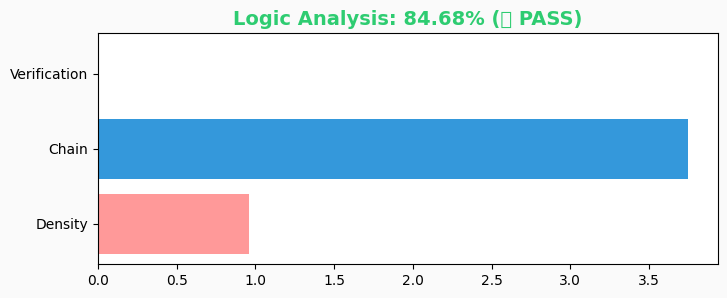


📜 門番の診断レポート ――――――――――――――――――――
  ▶ 【連鎖】論理的な繋がりが芽生えています。
――――――――――――――――――――――――――――――――――――――――



In [ ]:
#@title 📱 Logic Purity OS Interface V3 (With Diagnosis)
#@markdown 文章を入力して実行してください。門番がその理由を解説します。

Target_Text = "泥というものは水と土で出来ている" #@param {type:"string"}

import numpy as np
import matplotlib.pyplot as plt

def run_ui_judgment(text):
    if not text: return
    f = engine.analyze(text)
    w = engine.w
    z = np.dot(w[:3], f) - w[3]
    score = 1 / (1 + np.exp(-np.clip(z, -50, 50)))
    score_pct = round(score * 100, 2)

    # --- 門番の診断ロジック ---
    diagnosis = []
    if any(w in text for w in ["猫", "おにぎり"]):
        diagnosis.append("【検閲】不適切なノイズ（猫等）を検知。論理以前の問題です。")
    else:
        # 連鎖の評価
        if f[1] > 5: diagnosis.append("【連鎖】極めて強固な論理の鎖を確認しました。")
        elif f[1] > 0: diagnosis.append("【連鎖】論理的な繋がりが芽生えています。")
        else: diagnosis.append("【連鎖】事実の羅列に留まっており、推論が不足しています。")

        # 構造の評価
        if "であり" in text or "とは" in text:
            diagnosis.append("【構造】明確な定義・対比構造がスコアを支えています。")

        # 密度のアドバイス
        if len(text) < 20 and score_pct < 50:
            diagnosis.append("【助言】もう少し言葉を尽くすと、論理の密度が上がります。")

    # --- UI表示 ---
    status, color = ("✅ PASS", "#2ECC71") if score_pct > 70 else (("⚠️ CAUTION", "#F1C40F") if score_pct > 25 else ("❌ REJECT", "#E74C3C"))

    fig, ax = plt.subplots(figsize=(8, 3), facecolor='#FAFAFA')
    ax.barh(["Density", "Chain", "Verification"], f * w[:3], color=['#FF9999', '#3498DB', '#95A5A6'])
    ax.set_title(f"Logic Analysis: {score_pct}% ({status})", fontsize=14, fontweight='bold', color=color)
    plt.show()

    # 解説文の出力
    print(f"\n" + "📜 門番の診断レポート " + "―"*20)
    for line in diagnosis:
        print(f"  ▶ {line}")
    print("―"*40 + "\n")

run_ui_judgment(Target_Text)